In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def A_matrix_full(m):
    em = np.ones(m+2)
    e1=np.ones(m+1)
    A = (np.diag(-2*em,0)+np.diag(e1,-1)+np.diag(e1,1))*(m+1)**2
    A[0,0] = 1.; A[0,1]=0.; A[-1,-1]=1.; A[-1,-2]=0.
    return A

In [3]:
m=9
h = 1./(m+1)
x = np.linspace(0,1,m+2)
A=A_matrix_full(m)
print(A)

[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 100. -200.  100.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  100. -200.  100.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  100. -200.  100.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  100. -200.  100.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.  100. -200.  100.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  100. -200.  100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  100. -200.  100.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  100. -200.  100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  100. -200.  100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.]]


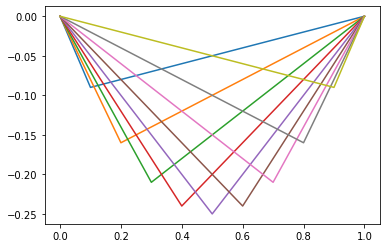

In [4]:
B = np.linalg.inv(A)

for j in range(1,m+1):
    plt.plot(x,B[:,j]/h)

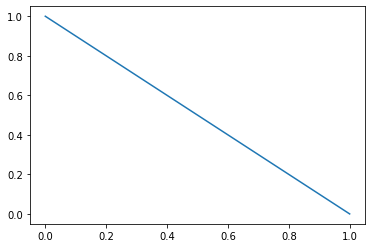

In [5]:
plt.plot(x,B[:,0])

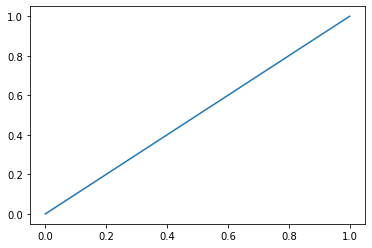

In [6]:
plt.plot(x,B[:,-1])

In [7]:
def A_matrix(m):
    em = np.ones(m)
    e1=np.ones(m-1)
    return (np.diag(-2*em,0)+np.diag(e1,-1)+np.diag(e1,1))*(m+1)**2

In [8]:
for m in(9,99,999):
    B = np.linalg.inv(A_matrix(m))
    print(np.max(np.abs(B/(m+1)**3)))
    print(np.max(np.abs(np.linalg.eigvals(B))))

2.5000000000000008e-05
0.10215864547265355
2.499999999999998e-09
0.10132951738692043
2.499999999999425e-13
0.10132126697569412


In [9]:
print(1./np.pi**2)

0.10132118364233778


In [10]:
m=50
A=A_matrix(m)
[lamda,u]=np.linalg.eig(A)
ind = np.argsort(abs(lamda))
spectrum = lamda[ind]
print('Eigenvalues: ', spectrum)
B = np.linalg.inv(A)
print('Norm of A^{-1}:', np.linalg.norm(B,2))

# sort the eigenvectors too
v=np.zeros(np.shape(u))
for i in range(len(ind)):
    v[:,i]=u[:,ind[i]]

Eigenvalues:  [-9.86648391e+00 -3.94285087e+01 -8.85739354e+01 -1.57116339e+02
 -2.44795714e+02 -3.51279463e+02 -4.76163656e+02 -6.18974565e+02
 -7.79170460e+02 -9.56143662e+02 -1.14922285e+03 -1.35767561e+03
 -1.58071121e+03 -1.81748360e+03 -2.06709462e+03 -2.32859741e+03
 -2.60100000e+03 -2.88326907e+03 -3.17433389e+03 -3.47309033e+03
 -3.77840513e+03 -4.08912010e+03 -4.40405661e+03 -4.72201999e+03
 -5.04180411e+03 -5.36219589e+03 -5.68198001e+03 -5.99994339e+03
 -6.31487990e+03 -6.62559487e+03 -6.93090967e+03 -7.22966611e+03
 -7.52073093e+03 -7.80300000e+03 -8.07540259e+03 -8.33690538e+03
 -8.58651640e+03 -8.82328879e+03 -9.04632439e+03 -9.25477715e+03
 -9.44785634e+03 -9.62482954e+03 -9.78502543e+03 -9.92783634e+03
 -1.00527205e+04 -1.01592043e+04 -1.02468837e+04 -1.03154261e+04
 -1.03645715e+04 -1.03941335e+04]
Norm of A^{-1}: 0.10135322868128707


In [11]:
from ipywidgets import interact, widgets

def plot_eigenvector(p):
    x=np.linspace(0,1,m+2)
    plt.clf()
    plt.plot(x[1:-1],v[:,p])
    plt.title('Eigenvector $u^{'+str(p)+'}$, corresponding to eigenvalue $\lambda^{'+str(p)+'}='+str(spectrum[p])+'$')

In [12]:
interact(plot_eigenvector, p=widgets.IntSlider(min=0,max=m-1,value=0))

interactive(children=(IntSlider(value=0, description='p', max=49), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_eigenvector(p)>